In [ ]:
import torch

# Check if a GPU is available and print the GPU type
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    print("No GPU available.")


No GPU available.


### `Data visualization and Preprocessing `

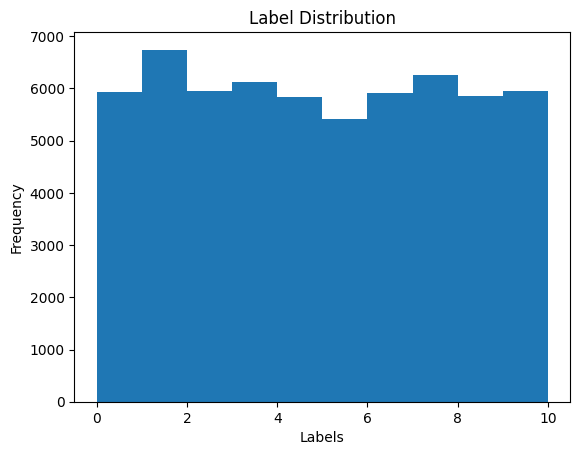

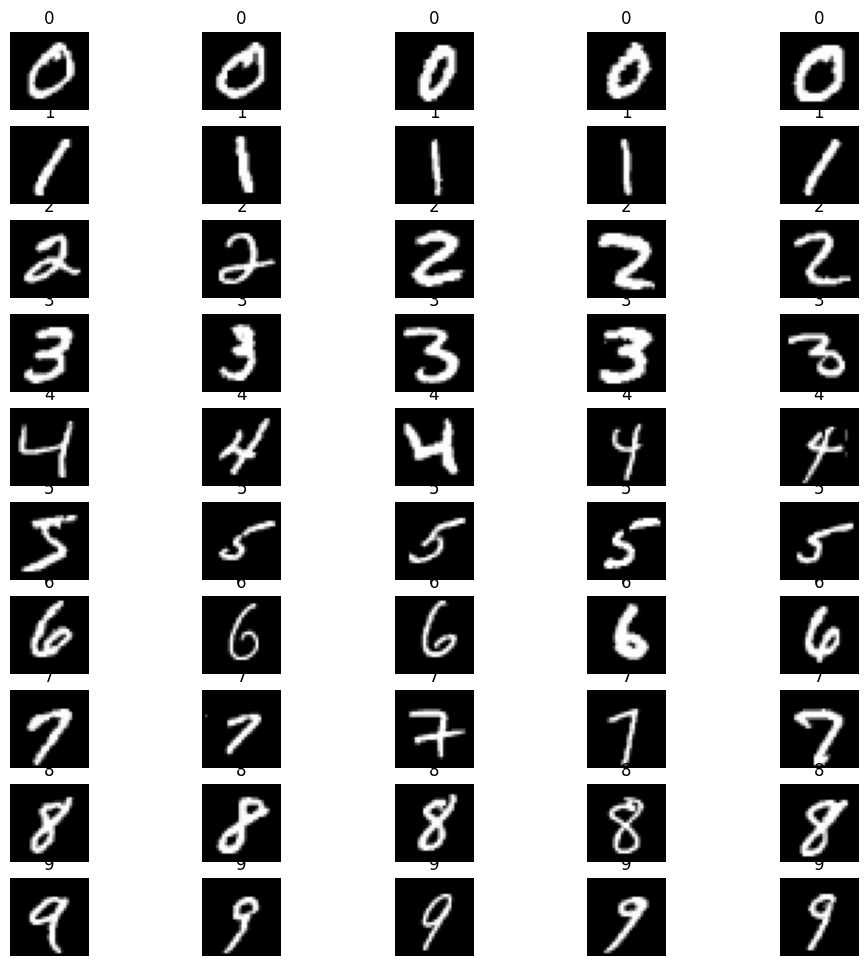

Class Counts: [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Step 2: Visualize the distribution of labels
def plot_label_distribution(dataset):
    labels = [item[1] for item in dataset]
    plt.hist(labels, bins=range(11))
    plt.xlabel("Labels")
    plt.ylabel("Frequency")
    plt.title("Label Distribution")
    plt.show()

plot_label_distribution(trainset)

# Step 3: Visualize several samples from each class
def visualize_samples(dataset, num_samples_per_class=5):
    class_names = [str(i) for i in range(10)]
    fig, axs = plt.subplots(10, num_samples_per_class, figsize=(12, 12))
    for i in range(10):
        class_samples = [item[0] for item in dataset if item[1] == i]
        for j in range(num_samples_per_class):
            axs[i, j].imshow(class_samples[j][0], cmap='gray')
            axs[i, j].axis('off')
            axs[i, j].set_title(class_names[i])
    plt.show()

visualize_samples(trainset)

# Step 4: Check for class imbalance
def check_class_balance(dataset):
    class_counts = [0] * 10
    for item in dataset:
        class_counts[item[1]] += 1
    return class_counts

class_counts = check_class_balance(trainset)
print("Class Counts:", class_counts)

# Step 5: Partition the dataset into train, validation, and test sets
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
trainset, valset = torch.utils.data.random_split(trainset, [train_size, val_size])

# Step 6: Define and train a Convolutional Neural Network (CNN) - This part is not included here but you can use a standard CNN architecture.
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2)
        self.dropout = nn.Dropout(0.25)
        self.fc = nn.Linear(64 * 5 * 5, 10)  # 10 classes for MNIST

    def forward(self, x):
        x = self.maxpool1(self.relu1(self.conv1(x)))
        x = self.maxpool2(self.relu2(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten the feature map
        x = self.dropout(x)
        x = self.fc(x)
        return x
    
# Step 7: Write a function to visualize feature maps
def visualize_feature_maps(model, image, layer_num):
    def get_interested_layers():
        interested_layers = []
        for i, layer in enumerate(model.features):
            if isinstance(layer, nn.Conv2d):
                interested_layers.append(i)
        return interested_layers

    def register_hooks():
        activations = []

        def hook_fn(module, input, output):
            activations.append(output)
        
        interested_layers = get_interested_layers()
        hooks = []
        for layer_num in interested_layers:
            hooks.append(model.features[layer_num].register_forward_hook(hook_fn))
        return hooks, activations

    def plot_feature_maps(feature_maps):
        feature_map = feature_maps[0][0][layer_num]
        num_feature_maps = feature_map.size(0)
        plt.figure(figsize=(10, 5))
        for i in range(num_feature_maps):
            plt.subplot(num_feature_maps/4, 4, i + 1)
            plt.imshow(feature_map[i].cpu().detach(), cmap='viridis')
            plt.axis('off')
        plt.show()

    model.eval()
    hooks, activations = register_hooks()
    with torch.no_grad():
        model(image.unsqueeze(0))
    plot_feature_maps(activations)

# Example usage:
# model = YourTrainedModel()
# image = YourInputImage()
# layer_num = ChooseLayerNumber()
# visualize_feature_maps(model, image, layer_num)


In [ ]:
### `Model Building`

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# Define a simple CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2)
        self.dropout = nn.Dropout(0.25)
        self.fc = nn.Linear(64 * 5 * 5, 10)  # 10 classes for MNIST

    def forward(self, x):
        x = self.maxpool1(self.relu1(self.conv1(x)))
        x = self.maxpool2(self.relu2(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten the feature map
        x = self.dropout(x)
        x = self.fc(x)
        return x



/home/arya/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cpu


### `Hyperparameter Tuning and Evaluation`

In [ ]:
# Create an instance of the CNN model and move it to the GPU
import wandb

wandb.init(project="Ass3-4f")
model = CNNModel().to(device)
# Define the loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define data transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset and create data loaders
mnist_train = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
mnist_test = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Initialize W&B project and define sweep configuration
sweep_config = {
    'method': 'random',  # You can choose different sweep methods (grid, random, etc.)
    'name': 'mnist_cnn_sweep',
    'metric': {'goal': 'maximize', 'name': 'val_accuracy'},
    'parameters': {
        'lr': {'values': [0.001, 0.01, 0.0001]},  # Learning rate values to experiment with
        'batch_size': {'values': [32, 64, 128]},  # Batch size values to experiment with
        'num_epochs': {'values': [5, 10, 15]},  # Number of epochs to experiment with
        'dropout_rate': {'values': [0.0, 0.25, 0.5]},  # Dropout rates to experiment with
    }
}
# Initialize sweep
sweep_id = wandb.sweep(sweep_config, project="Ass3-4")

### `Model Evaluation and Analysis`

In [ ]:
def train():
    # Set up a new run for each experiment
    with wandb.init() as run:
        # Initialize hyperparameters for the experiment
        config = run.config

        # Create an instance of the CNN model and move it to the GPU
        model = CNNModel().to(device)

        # Define the loss and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=config.lr)

        # Create data loaders with the specified batch size
        train_loader = DataLoader(mnist_train, batch_size=config.batch_size, shuffle=True)
        test_loader = DataLoader(mnist_test, batch_size=config.batch_size, shuffle=False)

        # Training the model
        for epoch in range(config.num_epochs):
            model.train()
            running_loss = 0.0
            correct_train = 0
            total_train = 0

            for images, labels in train_loader:
                optimizer.zero_grad()
                images, labels = images.to(device), labels.to(device)  # Move data to the GPU
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total_train += labels.size(0)
                correct_train += (predicted == labels).sum().item()

            train_loss = running_loss / len(train_loader)
            train_accuracy = 100 * correct_train / total_train

            # Validation
            model.eval()
            correct_val = 0
            total_val = 0
            val_loss = 0.0

            with torch.no_grad():
                for images, labels in test_loader:
                    images, labels = images.to(device), labels.to(device)  # Move data to the GPU
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
                    _, predicted = torch.max(outputs, 1)
                    total_val += labels.size(0)
                    correct_val += (predicted == labels).sum().item()

            val_loss = val_loss / len(test_loader)
            val_accuracy = 100 * correct_val / total_val

            wandb.log({"train_loss": train_loss, "train_accuracy": train_accuracy,
                      "val_loss": val_loss, "val_accuracy": val_accuracy}, step=epoch)

        # Model Evaluation
        model.eval()
        all_predictions = []
        all_targets = []

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)  # Move data to the GPU
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

                all_predictions.extend(predicted.cpu().numpy())
                all_targets.extend(labels.cpu().numpy())

        val_loss = val_loss / len(test_loader)
        val_accuracy = 100 * correct_val / total_val

        wandb.log({"train_loss": train_loss, "train_accuracy": train_accuracy,
                  "val_loss": val_loss, "val_accuracy": val_accuracy}, step=epoch)

        # Calculate and log classification report and confusion matrix to W&B
        class_names = [str(i) for i in range(10)]
        classification_rep = classification_report(all_targets, all_predictions, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], target_names=class_names, output_dict=True, zero_division=1)  # Handle undefined metrics
        confusion_mat = confusion_matrix(all_targets, all_predictions)

        # Log results and hyperparameters
        wandb.log({"classification_report": classification_rep, "confusion_matrix": confusion_mat})

# Run the sweep
wandb.agent(sweep_id, function=train)


Error in callback <function _WandbInit._resume_backend at 0x79c8867c5e10> (for pre_run_cell):


BrokenPipeError: ignored

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: Agent Starting Run: dzmopyp0 with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.5
wandb: 	lr: 0.001
wandb: 	num_epochs: 10


wandb: WARNING Step only supports monotonically increasing values, use define_metric to set a custom x axis. For details see: https://wandb.me/define-metric
wandb: WARNING (User provided step: 0 is less than current step: 13. Dropping entry: {'train_loss': 0.14520850990172476, 'train_accuracy': 95.585, 'val_loss': 0.04552688398996343, 'val_accuracy': 98.45, '_timestamp': 1697896598.895714}).


train_accuracy,▁█
train_loss,█▁
val_accuracy,▁█
val_loss,▁█
train_accuracy,98.43167
train_loss,0.05173
val_accuracy,98.64
val_loss,0.03961


Traceback (most recent call last):
  File "<ipython-input-5-390651ae396b>", line 60, in train
    wandb.log({"train_loss": train_loss, "train_accuracy": train_accuracy,
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/lib/preinit.py", line 36, in preinit_wrapper
    raise wandb.Error(f"You must call wandb.init() before {name}()")
wandb.errors.Error: You must call wandb.init() before wandb.log()
wandb: ERROR Run dzmopyp0 errored: Error('You must call wandb.init() before wandb.log()')
wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6gmzk137 with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.5
wandb: 	lr: 0.01
wandb: 	num_epochs: 10
wandb: Currently logged in as: aryamarda000 (aryamarda). Use `wandb login --relogin` to force relogin


train_accuracy,▁▆▇▇▇▇▇▇██
train_loss,█▃▂▂▂▂▂▂▁▁
val_accuracy,▁█▄▇▇▇▄███
val_loss,█▁▅▂▂▂▅▂▂▁
train_accuracy,96.17167
train_loss,0.1294
val_accuracy,97.9
val_loss,0.06744


wandb: Agent Starting Run: 7hsgif6n with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0
wandb: 	lr: 0.01
wandb: 	num_epochs: 15


train_accuracy,▁▆▇▇▇▇█████████
train_loss,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▂▅▆▅▆▅█▄▅▆█▇▇▆
val_loss,▆█▆▃▃▃▃▁▆▄▅▂▃▂▄
train_accuracy,98.33333
train_loss,0.05547
val_accuracy,98.8
val_loss,0.04143


wandb: Agent Starting Run: 3svrxpk1 with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0
wandb: 	lr: 0.001
wandb: 	num_epochs: 5


train_accuracy,▁▇▇██
train_loss,█▂▂▁▁
val_accuracy,▁▄▇▇█
val_loss,█▅▃▂▁
train_accuracy,98.9
train_loss,0.03549
val_accuracy,99.07
val_loss,0.02869


wandb: Agent Starting Run: 44hn3rtn with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.5
wandb: 	lr: 0.0001
wandb: 	num_epochs: 10


train_accuracy,▁▆▇▇██████
train_loss,█▂▂▂▁▁▁▁▁▁
val_accuracy,▁▄▆▇▇▇████
val_loss,█▄▃▂▂▂▁▁▁▁
train_accuracy,98.14167
train_loss,0.06292
val_accuracy,98.42
val_loss,0.04683


wandb: Agent Starting Run: of82aguh with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0
wandb: 	lr: 0.0001
wandb: 	num_epochs: 5


train_accuracy,▁▇▇██
train_loss,█▂▂▁▁
val_accuracy,▁▅▇██
val_loss,█▄▂▁▁
train_accuracy,97.41333
train_loss,0.08644
val_accuracy,98.11
val_loss,0.06119


wandb: Agent Starting Run: c75no2ib with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.25
wandb: 	lr: 0.001
wandb: 	num_epochs: 15


train_accuracy,▁▆▇▇▇▇▇████████
train_loss,█▃▂▂▂▂▂▁▁▁▁▁▁▁▁
val_accuracy,▁▃▅▆▇▆███▇████▆
val_loss,█▅▄▂▂▂▁▁▁▂▂▁▂▂▄
train_accuracy,99.54
train_loss,0.01354
val_accuracy,99.02
val_loss,0.03593


wandb: Agent Starting Run: cui7ln7y with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.25
wandb: 	lr: 0.0001
wandb: 	num_epochs: 10


train_accuracy,▁▆▇▇██████
train_loss,█▃▂▂▁▁▁▁▁▁
val_accuracy,▁▅▆▆▇▇████
val_loss,█▄▃▃▂▁▁▁▁▁
train_accuracy,98.74
train_loss,0.0415
val_accuracy,98.82
val_loss,0.03471


wandb: Agent Starting Run: 2az1zgyy with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.25
wandb: 	lr: 0.001
wandb: 	num_epochs: 15


train_accuracy,▁▆▇▇▇▇█████████
train_loss,█▃▂▂▂▂▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▅▅▆▇█▇▇▇▇▇▇██
val_loss,█▅▄▄▃▂▁▂▂▂▃▂▂▁▂
train_accuracy,99.50333
train_loss,0.01434
val_accuracy,99.31
val_loss,0.02471


wandb: Agent Starting Run: v837tyea with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.5
wandb: 	lr: 0.0001
wandb: 	num_epochs: 5


train_accuracy,▁▆▇██
train_loss,█▂▂▁▁
val_accuracy,▁▅▇██
val_loss,█▄▂▂▁
train_accuracy,96.75833
train_loss,0.11038
val_accuracy,97.57
val_loss,0.07937


wandb: Agent Starting Run: u6vjs9ip with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.5
wandb: 	lr: 0.0001
wandb: 	num_epochs: 5


train_accuracy,▁▇███
train_loss,█▂▁▁▁
val_accuracy,▁▅▇██
val_loss,█▃▂▁▁
train_accuracy,98.01167
train_loss,0.06539
val_accuracy,98.35
val_loss,0.04909


wandb: Agent Starting Run: yq732fsu with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.5
wandb: 	lr: 0.01
wandb: 	num_epochs: 10


train_accuracy,▁▇████████
train_loss,█▂▁▁▁▁▁▁▁▁
val_accuracy,▃▁▆▇██▅▇█▆
val_loss,▅█▃▂▂▂▄▂▁▃
train_accuracy,96.46667
train_loss,0.11818
val_accuracy,97.66
val_loss,0.07658


wandb: Agent Starting Run: 6f9q0x07 with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.25
wandb: 	lr: 0.01
wandb: 	num_epochs: 10


train_accuracy,▁▇▇███████
train_loss,█▃▂▁▁▁▁▁▁▁
val_accuracy,▁▅▇▇▇▆██▇▇
val_loss,█▄▂▂▂▂▁▁▂▂
train_accuracy,96.995
train_loss,0.09724
val_accuracy,98.24
val_loss,0.05659


wandb: Agent Starting Run: k0fis7rg with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0
wandb: 	lr: 0.01
wandb: 	num_epochs: 5


train_accuracy,▁▇▇██
train_loss,█▂▂▁▁
val_accuracy,▁▇▇▇█
val_loss,█▂▂▁▁
train_accuracy,97.07833
train_loss,0.09224
val_accuracy,98.48
val_loss,0.05132


wandb: Agent Starting Run: fnl02u78 with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.5
wandb: 	lr: 0.0001
wandb: 	num_epochs: 15


train_accuracy,▁▆▇▇▇▇█████████
train_loss,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▆▆▇▇▇████████
val_loss,█▅▃▃▂▂▂▁▁▁▁▁▁▁▁
train_accuracy,98.39167
train_loss,0.05385
val_accuracy,98.54
val_loss,0.04238


wandb: Agent Starting Run: etn6bh8y with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	lr: 0.001
wandb: 	num_epochs: 10


train_accuracy,▁▆▇▇▇█████
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▁▄▆▆▇▇▇█▇
val_loss,█▇▄▂▂▁▂▂▁▁
train_accuracy,99.35667
train_loss,0.01996
val_accuracy,99.14
val_loss,0.02522


wandb: Agent Starting Run: qkca57u7 with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.5
wandb: 	lr: 0.01
wandb: 	num_epochs: 10


train_accuracy,▁▆▇▇██████
train_loss,█▃▂▂▁▁▁▁▁▁
val_accuracy,▁▃▆▇▇██▆▅▇
val_loss,█▅▄▂▃▁▂▁▅▂
train_accuracy,97.22167
train_loss,0.09124
val_accuracy,98.45
val_loss,0.04597


wandb: Agent Starting Run: smisd5ux with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0
wandb: 	lr: 0.001
wandb: 	num_epochs: 10


train_accuracy,▁▆▇▇▇█████
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▅▅▆▆█▇███
val_loss,█▄▃▂▃▁▂▁▂▁
train_accuracy,99.22333
train_loss,0.02343
val_accuracy,99.16
val_loss,0.026


wandb: Agent Starting Run: 4umy7do9 with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0
wandb: 	lr: 0.0001
wandb: 	num_epochs: 10


train_accuracy,▁▆▇▇██████
train_loss,█▂▂▂▁▁▁▁▁▁
val_accuracy,▁▅▆▇▇█████
val_loss,█▄▃▂▂▂▁▁▁▁
train_accuracy,97.98667
train_loss,0.06568
val_accuracy,98.44
val_loss,0.04834


wandb: Agent Starting Run: j6ynskmc with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0
wandb: 	lr: 0.001
wandb: 	num_epochs: 10


train_accuracy,▁▆▇▇▇█████
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▃▅▃▇▇▆▆▇█
val_loss,█▆▃▇▁▂▂▄▁▁
train_accuracy,99.32667
train_loss,0.01966
val_accuracy,99.34
val_loss,0.02534


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: h9mgrnbi with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0
wandb: 	lr: 0.01
wandb: 	num_epochs: 10


train_accuracy,▁▇▇███████
train_loss,█▂▂▂▁▁▁▁▁▁
val_accuracy,▁▆▆█▅▄▇▅█▇
val_loss,█▃▃▁▄▆▂▅▂▅
train_accuracy,97.99167
train_loss,0.06348
val_accuracy,98.65
val_loss,0.04821


wandb: Agent Starting Run: 6ta9ttz1 with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0
wandb: 	lr: 0.01
wandb: 	num_epochs: 15


train_accuracy,▁▆▇▇██▇████████
train_loss,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁
val_accuracy,▂▅▅▆▁█▆▇▇▇▆▅▆▇▆
val_loss,▆▄▃▂█▁▂▂▁▃▂▄▃▂▃
train_accuracy,98.23333
train_loss,0.05926
val_accuracy,98.8
val_loss,0.04063


wandb: Agent Starting Run: prrrhh1j with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.25
wandb: 	lr: 0.0001
wandb: 	num_epochs: 15


train_accuracy,▁▆▇▇▇██████████
train_loss,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▆▆▇▇▇▇███████
val_loss,█▅▃▃▂▂▂▁▁▁▁▁▁▁▁
train_accuracy,98.49
train_loss,0.05087
val_accuracy,98.51
val_loss,0.04156


wandb: Agent Starting Run: vl4btprj with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.25
wandb: 	lr: 0.001
wandb: 	num_epochs: 5


train_accuracy,▁▇▇██
train_loss,█▂▂▁▁
val_accuracy,▁▆▇▇█
val_loss,█▄▂▂▁
train_accuracy,98.94667
train_loss,0.0327
val_accuracy,99.14
val_loss,0.02603


wandb: Agent Starting Run: 7iguhjjl with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.25
wandb: 	lr: 0.001
wandb: 	num_epochs: 10


train_accuracy,▁▆▇▇▇█████
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▇▆█▇▇████
val_loss,█▃▃▁▂▂▁▁▁▁
train_accuracy,99.36167
train_loss,0.01851
val_accuracy,99.12
val_loss,0.02747


wandb: Agent Starting Run: 9ys89rvu with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0
wandb: 	lr: 0.01
wandb: 	num_epochs: 10


train_accuracy,▁▆▇▇▇▇████
train_loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▅▃▄▅▆▅▅▄█
val_loss,█▅▅▄▅▂▃▃▆▁
train_accuracy,97.125
train_loss,0.09314
val_accuracy,98.37
val_loss,0.05282


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: s69qcamn with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	lr: 0.01
wandb: 	num_epochs: 15


train_accuracy,▁▆▇▇▇▇▇█▇██████
train_loss,█▃▂▂▂▂▂▂▁▁▁▁▁▁▁
val_accuracy,▁▅▄▃▆▆▅▇▆▆▇█▄▇▆
val_loss,█▅▆▆▃▄▄▂▃▂▂▁▆▁▃
train_accuracy,96.63333
train_loss,0.11005
val_accuracy,97.86
val_loss,0.06899


wandb: Agent Starting Run: gqn7iux5 with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.25
wandb: 	lr: 0.0001
wandb: 	num_epochs: 10


train_accuracy,▁▆▇▇██████
train_loss,█▃▂▂▁▁▁▁▁▁
val_accuracy,▁▅▆▇▇▇▇███
val_loss,█▄▃▂▂▂▁▁▁▁
train_accuracy,98.37167
train_loss,0.05442
val_accuracy,98.69
val_loss,0.03953


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: hmam64fe with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0
wandb: 	lr: 0.0001
wandb: 	num_epochs: 5


train_accuracy,▁▆▇██
train_loss,█▂▂▁▁
val_accuracy,▁▅▇██
val_loss,█▄▂▁▁
train_accuracy,96.76
train_loss,0.11165
val_accuracy,97.64
val_loss,0.08081


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: dxr8ii84 with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.25
wandb: 	lr: 0.001
wandb: 	num_epochs: 5


train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▃▄▁█▆
val_loss,█▅█▁▃
train_accuracy,99.03667
train_loss,0.03048
val_accuracy,98.98
val_loss,0.03229


wandb: Agent Starting Run: qkcc67ty with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.25
wandb: 	lr: 0.0001
wandb: 	num_epochs: 15


train_accuracy,▁▆▇▇▇▇█████████
train_loss,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▆▆▇▇▇▇▇██████
val_loss,█▅▃▃▂▂▂▂▁▁▁▁▁▁▁
train_accuracy,99.00167
train_loss,0.03317
val_accuracy,98.99
val_loss,0.03182


wandb: Agent Starting Run: 2lar1n65 with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0
wandb: 	lr: 0.001
wandb: 	num_epochs: 15


train_accuracy,▁▆▆▇▇▇▇████████
train_loss,█▃▃▂▂▂▂▁▁▁▁▁▁▁▁
val_accuracy,▁▅▅▄▆▇▆███▇█▇▆▇
val_loss,█▄▄▅▂▂▂▁▁▂▂▂▃▅▄
train_accuracy,99.52667
train_loss,0.01364
val_accuracy,99.15
val_loss,0.03343


wandb: Agent Starting Run: 1bl2dlq8 with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.5
wandb: 	lr: 0.01
wandb: 	num_epochs: 15


train_accuracy,▁▆▇▇▇▇█████████
train_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▇▆▇█▇▇▇█▇▆▇▇▆▆
val_loss,█▂▃▂▁▂▁▂▁▂▃▁▂▃▂
train_accuracy,97.96833
train_loss,0.06542
val_accuracy,98.62
val_loss,0.04189


wandb: Agent Starting Run: awqvo4vb with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.25
wandb: 	lr: 0.001
wandb: 	num_epochs: 15


train_accuracy,▁▆▇▇▇▇▇████████
train_loss,█▃▂▂▂▂▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▅▆▇▇▇▇▇▇▇██▆▇
val_loss,█▅▃▃▂▂▂▁▂▁▂▁▁▂▂
train_accuracy,99.535
train_loss,0.01532
val_accuracy,99.17
val_loss,0.02669


wandb: Agent Starting Run: u5vu1y0e with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0
wandb: 	lr: 0.001
wandb: 	num_epochs: 5


train_accuracy,▁▇▇██
train_loss,█▂▂▁▁
val_accuracy,▁▅▆█▇
val_loss,█▃▂▂▁
train_accuracy,98.76
train_loss,0.03986
val_accuracy,98.84
val_loss,0.03392


wandb: Agent Starting Run: s3rpr5vm with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.25
wandb: 	lr: 0.0001
wandb: 	num_epochs: 10


train_accuracy,▁▆▇▇██████
train_loss,█▂▂▂▁▁▁▁▁▁
val_accuracy,▁▄▆▇▇▇████
val_loss,█▄▃▂▂▂▁▁▁▁
train_accuracy,98.62667
train_loss,0.04384
val_accuracy,98.73
val_loss,0.03538


wandb: Agent Starting Run: l13snvda with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0
wandb: 	lr: 0.001
wandb: 	num_epochs: 15


train_accuracy,▁▆▆▇▇▇▇████████
train_loss,█▃▃▂▂▂▂▁▁▁▁▁▁▁▁
val_accuracy,▁▂▄▄▆▆██▇▇▇▇█▆▆
val_loss,█▇▄▃▂▃▁▁▁▂▂▃▁▃▄
train_accuracy,99.53333
train_loss,0.0138
val_accuracy,99.1
val_loss,0.03375


wandb: Agent Starting Run: gxlgtt23 with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.5
wandb: 	lr: 0.0001
wandb: 	num_epochs: 5


train_accuracy,▁▇▇██
train_loss,█▂▂▁▁
val_accuracy,▁▅▇██
val_loss,█▄▂▂▁
train_accuracy,96.69667
train_loss,0.11047
val_accuracy,97.53
val_loss,0.08207


wandb: Agent Starting Run: ynjht0wd with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.25
wandb: 	lr: 0.0001
wandb: 	num_epochs: 5


train_accuracy,▁▇███
train_loss,█▂▁▁▁
val_accuracy,▁▅▇██
val_loss,█▄▂▂▁
train_accuracy,97.52667
train_loss,0.0809
val_accuracy,98.23
val_loss,0.05756


wandb: Agent Starting Run: m9wv5q29 with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.25
wandb: 	lr: 0.0001
wandb: 	num_epochs: 10


train_accuracy,▁▆▇▇██████
train_loss,█▃▂▂▁▁▁▁▁▁
val_accuracy,▁▄▆▇▇▇████
val_loss,█▄▃▂▂▂▁▁▁▁
train_accuracy,98.01667
train_loss,0.06607
val_accuracy,98.42
val_loss,0.0481


wandb: Agent Starting Run: qse05sef with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.25
wandb: 	lr: 0.0001
wandb: 	num_epochs: 10


train_accuracy,▁▆▇▇██████
train_loss,█▃▂▂▁▁▁▁▁▁
val_accuracy,▁▄▆▇▇█████
val_loss,█▅▃▂▂▂▁▁▁▁
train_accuracy,98.075
train_loss,0.06397
val_accuracy,98.43
val_loss,0.04708


wandb: Agent Starting Run: 21kniih9 with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0
wandb: 	lr: 0.01
wandb: 	num_epochs: 15


train_accuracy,▁▆▇▇███████████
train_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▂▅▇▇▆▃█▄▇▄█▇▅▅
val_loss,█▅▄▁▃▃▄▁▅▃▆▂▃▅▄
train_accuracy,97.725
train_loss,0.07587
val_accuracy,98.39
val_loss,0.05303


wandb: Agent Starting Run: 9qtqzdyb with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.25
wandb: 	lr: 0.01
wandb: 	num_epochs: 15


train_accuracy,▁▆▇▇▇▇▇▇███████
train_loss,█▃▂▂▂▂▁▂▁▁▁▁▁▂▁
val_accuracy,▆█▅▆▃▇▄▁▁▆▁▅▅▅▁
val_loss,▃▁▃▃▆▂▃▅▇▄▆▄▅▄█
train_accuracy,97.14
train_loss,0.10032
val_accuracy,97.78
val_loss,0.08236


wandb: Agent Starting Run: rr3bixf4 with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.5
wandb: 	lr: 0.0001
wandb: 	num_epochs: 10


train_accuracy,▁▆▇▇██████
train_loss,█▃▂▂▁▁▁▁▁▁
val_accuracy,▁▅▆▇▇▇████
val_loss,█▄▃▂▂▂▁▁▁▁
train_accuracy,97.85167
train_loss,0.06842
val_accuracy,98.34
val_loss,0.05264


wandb: Agent Starting Run: xdoqpakz with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.5
wandb: 	lr: 0.01
wandb: 	num_epochs: 10


train_accuracy,▁▇▇▇█▇████
train_loss,█▂▁▂▂▂▁▁▁▁
val_accuracy,▇▆▄█▇█▁▄█▇
val_loss,▁▁▄▁▁▁█▆▁▂
train_accuracy,97.09333
train_loss,0.10231
val_accuracy,98.37
val_loss,0.05674


wandb: Agent Starting Run: cmbwsxdg with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0
wandb: 	lr: 0.001
wandb: 	num_epochs: 15


train_accuracy,▁▆▇▇▇▇▇▇███████
train_loss,█▃▂▂▂▂▂▁▁▁▁▁▁▁▁
val_accuracy,▁▄▅▆▆▇▆▇▇███▇██
val_loss,█▄▃▂▂▂▂▂▂▁▁▁▂▂▁
train_accuracy,99.54167
train_loss,0.01318
val_accuracy,99.32
val_loss,0.02459


wandb: Agent Starting Run: 5rsywgnr with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.25
wandb: 	lr: 0.0001
wandb: 	num_epochs: 5


wandb: Ctrl + C detected. Stopping sweep.


Error in callback <function _WandbInit._pause_backend at 0x79c884523d90> (for post_run_cell):


BrokenPipeError: ignored

### `Training and evalution on Noisy Dataset`

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
import scipy.io
import numpy as np
from torch.utils.data import random_split

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2)
        self.dropout = nn.Dropout(0.25)
        self.fc = nn.Linear(64 * 5 * 5, 10)  # 10 classes for MNIST

    def forward(self, x):
        x = self.maxpool1(self.relu1(self.conv1(x)))
        x = self.maxpool2(self.relu2(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten the feature map
        x = self.dropout(x)
        x = self.fc(x)
        return x
    
class NoisyMNISTDatasetTrain(torch.utils.data.Dataset):
    def __init__(self, dataset):
        self.data = dataset['train_x'].astype(np.float32) / 255.0  # Load training images
        self.labels = dataset['train_y'].argmax(axis=1).astype(np.int64)  # Convert one-hot labels to integers
        self.length = self.data.shape[0]

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

class NoisyMNISTDatasetTest(torch.utils.data.Dataset):
    def __init__(self, dataset):
        self.data = dataset['test_x'].astype(np.float32) / 255.0  # Load training images
        self.labels = dataset['test_y'].argmax(axis=1).astype(np.int64)  # Convert one-hot labels to integers
        self.length = self.data.shape[0]

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [7]:
mat = scipy.io.loadmat('mnist-with-awgn.mat')  # Provide the correct path

In [8]:
# Define hyperparameters
batch_size = 64
num_epochs = 10
learning_rate = 0.001

# Create DataLoader for the noisy dataset
noisy_mnist_dataset = NoisyMNISTDatasetTrain(mat)
noisy_mnist_loader = DataLoader(noisy_mnist_dataset, batch_size=batch_size, shuffle=True)

# Create a model, optimizer, and loss criterion
model = CNNModel()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Training loop
def train(noisy_mnist_loader, model, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        # Inside your training loop
        for images, labels in noisy_mnist_loader:
            optimizer.zero_grad()
            
            # Reshape the input to match the model's expected shape
            images = images.view(images.size(0), 1, 28, 28)  # Assuming the images are 28x28 pixels with 1 channel
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = running_loss / len(noisy_mnist_loader)
        train_accuracy = 100 * correct_train / total_train

        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%')

train(noisy_mnist_loader, model, criterion, optimizer, num_epochs)

Epoch 1/10, Train Loss: 0.3024, Train Acc: 90.93%
Epoch 2/10, Train Loss: 0.1174, Train Acc: 96.33%
Epoch 3/10, Train Loss: 0.0951, Train Acc: 97.05%
Epoch 4/10, Train Loss: 0.0809, Train Acc: 97.49%
Epoch 5/10, Train Loss: 0.0717, Train Acc: 97.68%
Epoch 6/10, Train Loss: 0.0662, Train Acc: 97.91%
Epoch 7/10, Train Loss: 0.0613, Train Acc: 98.07%
Epoch 8/10, Train Loss: 0.0561, Train Acc: 98.20%
Epoch 9/10, Train Loss: 0.0523, Train Acc: 98.28%
Epoch 10/10, Train Loss: 0.0479, Train Acc: 98.44%


In [9]:
noisy_mnist_dataset_test = NoisyMNISTDatasetTest(mat)
test_loader = DataLoader(noisy_mnist_dataset_test, batch_size=batch_size, shuffle=True)

# Create a classification report
test_loss = 0.0
correct_test = 0
total_test = 0

model.eval()
all_predictions = []
all_targets = []

with torch.no_grad():
    for images, labels in test_loader:
        # Reshape the input to match the model's expected shape
        images = images.view(images.size(0), 1, 28, 28)  # Assuming the images are 28x28 pixels with 1 channel
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
        all_predictions.extend(predicted.cpu().numpy())
        all_targets.extend(labels.cpu().numpy())

test_loss = test_loss / len(test_loader)
test_accuracy = 100 * correct_test / total_test

# Print the classification report
class_names = [str(i) for i in range(10)]
classification_rep = classification_report(all_targets, all_predictions, target_names=class_names)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')
print(classification_rep)

Test Loss: 0.0527, Test Accuracy: 98.18%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



###  `Implement an Autoencoder class which will help you de-noise the noisy mnist dataset from Part 4.5.`

In [11]:
# Define the Autoencoder class
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, kernel_size=4, stride=2, padding=1),  # Adjust padding to maintain the size
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=4, stride=2, padding=1)  # Adjust padding to maintain the size
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

#### `Training the Autoencoder model on Noisy dataset from part 4.5`

In [13]:

# Define hyperparameters (same as in Part 4.5)
batch_size = 64
num_epochs = 10
learning_rate = 0.001

# Create DataLoader for the noisy dataset (same as in Part 4.5)
noisy_mnist_dataset_train = NoisyMNISTDatasetTrain(mat)
noisy_mnist_loader_train = DataLoader(noisy_mnist_dataset_train, batch_size=batch_size, shuffle=True)



# Train the Autoencoder
autoencoder = Autoencoder()
autoencoder_optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)
autoencoder_criterion = nn.MSELoss()  # Mean Squared Error loss for reconstruction

def train_autoencoder(autoencoder_loader, autoencoder, criterion, optimizer, num_epochs):
    autoencoder.train()
    for epoch in range(num_epochs):
        running_loss = 0.0

        for images, _ in autoencoder_loader:
            optimizer.zero_grad()
            # Reshape the input to [batch_size, 1, 28, 28] assuming MNIST images
            images = images.view(images.size(0), 1, 28, 28)
            reconstructed = autoencoder(images)
            loss = criterion(reconstructed, images)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()


        train_loss = running_loss / len(autoencoder_loader)
        print(f'Autoencoder Epoch {epoch + 1}/{num_epochs}, Loss: {train_loss:.4f}')

# Training the Autoencoder
train_autoencoder(noisy_mnist_loader_train, autoencoder, autoencoder_criterion, autoencoder_optimizer, num_epochs)


Autoencoder Epoch 1/10, Loss: 0.0460
Autoencoder Epoch 2/10, Loss: 0.0395
Autoencoder Epoch 3/10, Loss: 0.0382
Autoencoder Epoch 4/10, Loss: 0.0375
Autoencoder Epoch 5/10, Loss: 0.0370
Autoencoder Epoch 6/10, Loss: 0.0366
Autoencoder Epoch 7/10, Loss: 0.0363
Autoencoder Epoch 8/10, Loss: 0.0360
Autoencoder Epoch 9/10, Loss: 0.0358
Autoencoder Epoch 10/10, Loss: 0.0356


#### `Denoise the dataset using the trained Autoencoder and using the de-noised dataset, train your best model from he previous parts.`

In [14]:

# Denoise the dataset using the trained Autoencoder
denoised_mnist_dataset = []
for noisy_data, labels in noisy_mnist_dataset_train:
    noisy_data = torch.from_numpy(noisy_data)  # Convert NumPy array to PyTorch tensor
    noisy_data = noisy_data.view(1, 1, 28, 28)  # Reshape to [batch_size, channels, height, width]
    denoised_data = autoencoder(noisy_data)
    denoised_data = denoised_data.view(28, 28)  # Reshape back to 2D [28, 28]
    denoised_mnist_dataset.append((denoised_data, labels))

# Create DataLoader for the denoised dataset
denoised_mnist_loader = DataLoader(denoised_mnist_dataset, batch_size=batch_size, shuffle=True)

print("Endend")
# Train your best model on the denoised dataset
# Define a model (same as in Part 4.5)
model = CNNModel()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Training loop (training your best model on the denoised dataset)
def train_denoised(denoised_mnist_loader, model, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels in denoised_mnist_loader:
            optimizer.zero_grad()
            images = images.view(images.size(0), 1, 28, 28)  # Reshape input
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward(retain_graph=True)  # Add retain_graph=True here
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = running_loss / len(denoised_mnist_loader)
        train_accuracy = (correct_train / total_train) * 100
        print(f'Denoised Dataset - Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%')
# Training the model on the denoised dataset
train_denoised(denoised_mnist_loader, model, criterion, optimizer, num_epochs)

Endend
Denoised Dataset - Epoch 1/10, Train Loss: 0.3145, Train Acc: 90.36%
Denoised Dataset - Epoch 2/10, Train Loss: 0.1417, Train Acc: 95.52%
Denoised Dataset - Epoch 3/10, Train Loss: 0.1179, Train Acc: 96.28%
Denoised Dataset - Epoch 4/10, Train Loss: 0.1053, Train Acc: 96.67%
Denoised Dataset - Epoch 5/10, Train Loss: 0.0957, Train Acc: 96.95%
Denoised Dataset - Epoch 6/10, Train Loss: 0.0887, Train Acc: 97.09%
Denoised Dataset - Epoch 7/10, Train Loss: 0.0851, Train Acc: 97.25%
Denoised Dataset - Epoch 8/10, Train Loss: 0.0779, Train Acc: 97.48%
Denoised Dataset - Epoch 9/10, Train Loss: 0.0751, Train Acc: 97.55%
Denoised Dataset - Epoch 10/10, Train Loss: 0.0707, Train Acc: 97.70%


#### `Evaluating your model on test data and print the classification report.`
#### `Analyse and compare the results/accuracy scores as obtained in Part 4.5 and 4.6.`

In [15]:

# Evaluate the model on the test data (same as in Part 4.5)
noisy_mnist_dataset_test = NoisyMNISTDatasetTest(mat)
noisy_mnist_loader_test = DataLoader(noisy_mnist_dataset_test, batch_size=batch_size, shuffle=True)
# noisy_mnist_loader_test = DataLoader(noisy_mnist_dataset_test, batch_size=batch_size, shuffle=False)

test_loss = 0.0
correct_test = 0
total_test = 0

model.eval()
all_predictions = []
all_targets = []

with torch.no_grad():
    for images, labels in noisy_mnist_loader_test:
        images = images.view(images.size(0), 1, 28, 28)  # Reshape input
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
        all_predictions.extend(predicted.cpu().numpy())
        all_targets.extend(labels.cpu().numpy())

test_loss = test_loss / len(noisy_mnist_loader_test)
test_accuracy = 100 * correct_test / total_test

# Print the classification report for the noisy test dataset
class_names = [str(i) for i in range(10)]
classification_rep_noisy = classification_report(all_targets, all_predictions, target_names=class_names)

print("Results on the noisy test dataset (Part 4.5):")
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')
print(classification_rep_noisy)

# Evaluate the model on the test data using the denoised model
test_loss = 0.0
correct_test = 0
total_test = 0

model.eval()
all_predictions = []
all_targets = []

with torch.no_grad():
    for images, labels in denoised_mnist_loader:
        images = images.view(images.size(0), 1, 28, 28)  # Reshape input
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
        all_predictions.extend(predicted.cpu().numpy())
        all_targets.extend(labels.cpu().numpy())

test_loss = test_loss / len(denoised_mnist_loader)
test_accuracy = 100 * correct_test / total_test

# Print the classification report for the denoised test dataset
classification_rep_denoised = classification_report(all_targets, all_predictions, target_names=class_names)

print("Results on the denoised test dataset (Part 4.6):")
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')
print(classification_rep_denoised)

Results on the noisy test dataset (Part 4.5):
Test Loss: 0.0763, Test Accuracy: 97.69%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.95      0.99      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Results on the denoised test dataset (Part 4.6):
Test Loss: 0.0441, Test Accuracy: 98.58%
              precision    recall  f1-score   support

         